#PyTorch Intro - Tensory - Laboratorium

**Tensor** w bibliotece PyTorch jest specjalizowaną strukturą danych podobną do wielowymiarowej tablicy `ndarray` w bibliotece numpy. Na tensorach można wykonywać typowe operacje algebry liniowej oraz operacje specyficzne dla głębokiego uczenia jak na przykład automatyczne różniczkowanie (autograd).
Tensory wykorzystujemy do przechowywania przetwarzanych danych oraz parametrów (wag) modeli. Biblioteka PyTorch pozwala na efektywne przetwarzanie tensorów na CPU lub GPU.

##Przygotowanie środowiska
Upewnij się, że notatnik jest uruchomiony na maszynie z GPU. Jeśli GPU nie jest dostępne zmień typ maszyny (Runtime | Change runtime type) i wybierz T4 GPU.

In [1]:
!nvidia-smi

Tue Mar 11 19:17:22 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Biblioteka PyTorch (`torch`) jest domyślnie zainstalowana w środowisku COLAB.

In [44]:
import torch
import numpy as np
import time
import matplotlib.pyplot as plt

print(f"Wersja biblioteki PyTorch: {torch.__version__}")

Wersja biblioteki PyTorch: 2.5.1+cu124


Sprawdzenie dostępnego urządzenia GPU.

In [3]:
print(f"Dostępność GPU: {torch.cuda.is_available()}")
print(f"Typ GPU: {torch.cuda.get_device_name(0)}")

Dostępność GPU: True
Typ GPU: Tesla T4


##Zadania do wykonania

###Zadanie 1: Tworzenie tensorów
Wygeneruj tensor o pokazanej poniżej zawartości nie używając pętli. Wskazówka: Wykorzystaj funkcję `torch.full` i mechanizm indeksowania tensorów.

```
 1 2 1 1 1 1 2 1 1 1 1 2 1
 1 2 1 1 1 1 2 1 1 1 1 2 1
 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 1 1 1 1 2 1 1 1 1 2 1
 1 2 1 3 3 1 2 1 3 3 1 2 1
 1 2 1 3 3 1 2 1 3 3 1 2 1
 1 2 1 1 1 1 2 1 1 1 1 2 1
 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 1 1 1 1 2 1 1 1 1 2 1
 1 2 1 3 3 1 2 1 3 3 1 2 1
 1 2 1 3 3 1 2 1 3 3 1 2 1
 1 2 1 1 1 1 2 1 1 1 1 2 1
 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 1 1 1 1 2 1 1 1 1 2 1
```



In [20]:
data = [
    [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
    [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
    [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
    [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
    [1, 2, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2, 1],
    [1, 2, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2, 1],
    [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
    [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
    [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
    [1, 2, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2, 1],
    [1, 2, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2, 1],
    [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
    [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
    [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1]
]

given_tensor = torch.tensor(data)

rows = 14
columns = 13

# tensor with correct size filled with ones
created_tensor = torch.full(size=(rows, columns), fill_value=1)

# setting 2's : columns = [1, 6, 11], rows = [2, 7, 12]
created_tensor[2::5, :] = 2
created_tensor[:, 1::5] = 2

# setting 3's : squares [4:5\ 9:10, 3:4 \ 8:9]
created_tensor[4:6, 3:5] = 3
created_tensor[4:6, 8:10] = 3
created_tensor[9:11, 3:5] = 3
created_tensor[9:11, 8:10] = 3


print(created_tensor)

print(created_tensor == given_tensor)

tensor([[1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2, 1],
        [1, 2, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2, 1],
        [1, 2, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1]])
tensor([[True, True, True, True, True, True, True, True, True, True, True, True,
         True],
        [True, True, True, True, True, True, True, True, True, True, True, True,
         True],
        [True, True, True, True, True, True, True, True, True, True, True, True,
         True],
        [True, True, T

###Zadanie 2: Wartości własne macierzy
Utwórz dwuwymiarowy tensor $M$ o rozmiarach $20 \times 20$ zainicjalizowany losowymi wartościami o standardowym rozkładzie normalnym.
Następnie wyznacz wartości własne macierzy $
X = M D M^{-1} \, ,
$
gdzie
$$
\begin{align}
D =
\begin{bmatrix}
1 & 0 & 0 & \ldots & 0 & 0 \\
0 & 2 & 0 & \ldots  & 0 & 0 \\
\vdots &  & \ddots &  &  & \vdots \\
\vdots &  &  &  & 19 & 0 \\
0 & \ldots & \ldots & \ldots & 0 & 20
\end{bmatrix}
\end{align} \, .
$$
Nie używaj pętli. Macierz $D$ wygeneruj korzystając z funkcji `torch.diag`. Do wyznaczenia wektorów własnych wykorzystaj funkcję `torch.linalg.eig`.

In [41]:
given_size = (20, 20)

# creating M
M = torch.randn(size=given_size)

# creating D
diagonal = torch.arange(1, 21, dtype=torch.float32)
D = torch.diag(diagonal)

# creating inverse of M
M_inv = torch.linalg.inv(M)

# creating X
X = M @ D @ M_inv

# calculating eigenvectors and eigenvalues
eigen_values, eigen_vectors = torch.linalg.eig(X)

print(eigen_values.real)

tensor([20.0000, 19.0000,  1.0000, 18.0000,  2.0000, 17.0000,  3.0000,  4.0000,
        16.0000,  5.0000, 15.0000,  6.0000,  7.0000,  8.0000,  9.0000, 14.0000,
        13.0000, 10.0000, 11.0000, 12.0000])


###Zadanie 3: Porównanie czasów wykonywania operacji na CPU i GPU
Napisz kod który wyświetli wykres liniowy przedstawiający zależność czasu mnożenia dwóch macierzy kwadratowych $n \times n$ od ich rozmiaru $n$ dla działań wykonanych na CPU i na GPU.
Mierząc czas wykonania operacji na GPU pamiętaj aby przed rozpocząciem i przed zakończeniem pomiaru czasu wywołać polecenie `torch.cuda.synchronize()` które czeka na zakończenie obliczeń na GPU.


```
torch.cuda.synchronize()
start_time = time.time()
...
...
torch.cuda.synchronize()
end_time = time.time()
```



In [55]:
def create_square_matrix(n: int) -> torch.Tensor:
  return torch.randn(size=(n,n), dtype=torch.float32)

def calculate_time(matrix_sizes: list, is_cuda=False) -> list:
  calculated_times = []
  device = "cuda" if is_cuda else "cpu"

  for size in matrix_sizes:
    first_matrix = create_square_matrix(size).to(device)
    second_matrix = create_square_matrix(size).to(device)

    if is_cuda:
      torch.cuda.synchronize()

    start_time = time.time()
    first_matrix @ second_matrix

    if is_cuda:
      torch.cuda.synchronize()

    end_time = time.time()

    calculation_time = end_time - start_time

    calculated_times.append(calculation_time)

  return calculated_times

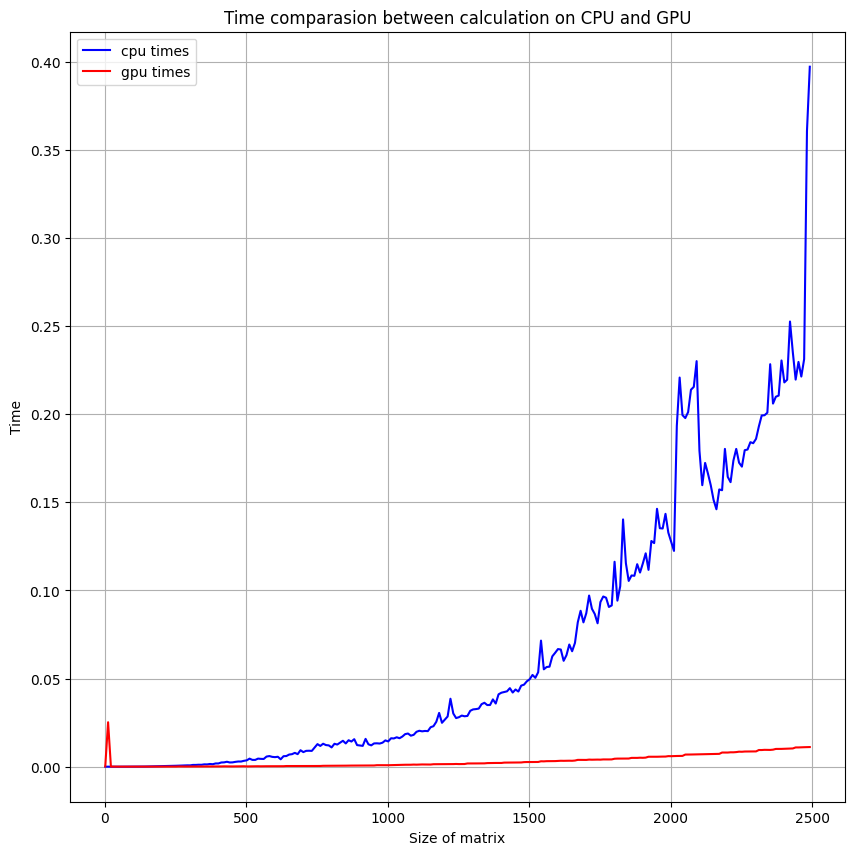

In [58]:
sizes = np.arange(1, 2501, 10)

gpu_times = calculate_time(sizes, True)
cpu_times = calculate_time(sizes, False)

plt.figure(figsize=(10,10))
plt.title("Time comparasion between calculation on CPU and GPU")
plt.xlabel("Size of matrix")
plt.ylabel("Time")
plt.plot(sizes, cpu_times, color='blue', label="cpu times")
plt.plot(sizes, gpu_times, color='red', label="gpu times")
plt.legend()
plt.grid(True)
plt.show()

###Zadanie 4 (opcjonalne): Konwencja sumacyjna Einsteina
Zapisz podane operacje korzystając z konwencji sumacyjnej Einsteina.

Wyznacz ślad (suma elementów na przekątnej) macierzy `M`.

In [60]:
M = torch.tensor([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])

In [62]:
trace = torch.einsum("ii->", M)
print(f"Trace is : {trace}")

Trace is : 15


In [6]:
#Oczekiwany wynik: 15

Wyznacz wartość formy biliniowej
$z = \mathbf{x}^T \mathbf{A} \mathbf{y}$

In [64]:
x = torch.tensor([1, 2])
A = torch.tensor([[3, 4], [5, 6]])
y = torch.tensor([7, 8])

In [66]:
z = torch.einsum("i,ij,j ->", x, A, y)
print(f"z = {z}")

z = 219


In [8]:
#Oczekiwany wynik 219

Wyznacz ważoną sumę wektorów wierszowych macierzy `V` z wagami w wektorze `w`.
$$\mathbf{z}_j = \sum_i \mathbf{w}_i \mathbf{V}_{ij}$$




In [67]:
w = torch.tensor([0.2, 0.3, 0.5])
V = torch.tensor([[1, 2], [3, 4], [5, 6]], dtype=torch.float32)  # Shape: [3, 2]

In [72]:
z_j = torch.einsum("i,ij -> j", w, V)
print(z_j)

tensor([3.6000, 4.6000])


In [10]:
#Oczekiwany wynik [3.6000, 4.6000]

Dla trójwymiarowej macierzy `A` wyznacz sumę elementów po drugiej i trzeciej współrzędnej:
$$\mathbf{z}_i = \sum_{j,k} \mathbf{A}_{ijk}$$

In [75]:
A = torch.tensor(
    [[[1, 2], [3, 4], [5, 6]],
     [[2, 5], [1, 7], [1, 3]]]
    )
print(A.shape)

torch.Size([2, 3, 2])


In [77]:
z_i = torch.einsum("ijk->i", A)
print(z_i)

tensor([21, 19])


In [12]:
#Oczekiwany wynik: [21, 19]